In [2]:
import random
import time
import matplotlib.pyplot as plt
import functools
import numpy as np
from scipy.optimize import curve_fit

In [515]:
def var(event,w):
    vars = []
    vars.extend([i for i in range(event, event + len(w))])
    return set(vars)

def bad_events(string,w):
    bad = set()
    for i in range(len(string)):
        if (i + len(w)) <= len(string):
            if string[i : i + len(w)] == w:
                bad.add(i)
    return bad

def boundary(R,string,w):
    bound = set()
    for i in range(len(string) - len(w)+1):
        for j in R:
            if not(var(i,w).isdisjoint(var(j,w))) and  (i not in R):
                bound.add(i)
    return bound

In [516]:
def resample(string,w):
    N = set()
    R = bad_events(string,w)
    
    #Determine resampled events
    while (boundary(R,string,w) - N) != set():
        flag = True

        sigmaR = set()
        for i in R:
            sigmaR |= var(i,w)

        for i in (boundary(R,string,w) - N):

            index_check = []
            blocking_string = ""
            for j in sorted(list(var(i,w) & sigmaR)):
                index_check.append(j)
                blocking_string += string[j]


            if i != index_check[0]:
                blocking_string = w[:len(w) - len(blocking_string)] + blocking_string
                index_check = [j for j in range(i, index_check[0])] + index_check
            elif i == index_check[0] and len(index_check) < len(w):
                blocking_string += w[len(blocking_string):]


            if blocking_string == w: #agrees not blocked
                flag = True
            else:
                flag = False


            if ((var(i,w) & sigmaR) != set()) and flag:
                R.add(i)
            else:
                N.add(i)

    return R


In [517]:
def sampler(alphabet,string,w):
    wfstring = list(string)
    round = 0
    while bad_events(''.join(wfstring),w) != set():
        round += 1
        for i in resample(''.join(wfstring),w):
            for j in var(i,w):
                 wfstring[j] = alphabet[random.randint(0,len(alphabet)-1)]

    return (''.join(wfstring), round)

In [518]:
def randstring(alphabet,length):
    string = ""
    for i in range(length):
        string +=  str(alphabet[random.randint(0,len(alphabet)-1)])
    return string

In [543]:
def runtime(alph,w,low,high,skip,average):
    avg_rounds = []
    string_len = [i for i in range(low,high,skip)]
    for n in range(low,high,skip):
        rounds = []
        for m in range(average):
            x,y = sampler(alph,randstring(alph,n),w)
            rounds.append(y)
        avg_rounds.append(functools.reduce(lambda x,y: x + y, rounds)/len(rounds))
        print(n)
    return (string_len,avg_rounds)

In [589]:
def sampling_factory(max,sampler,alph,string,w):
    w_strings = []
    for i in range(max):
        s,r = sampler(alph,string,w)
        w_strings.append(s)

    sfrequency = []

    skip = []
    for i in range(len(w_strings)):
        if w_strings[i] in skip:
            continue
        else:
            sequal = [w_strings[i]]
            for j in range(i+1,len(w_strings)):
                if w_strings[j] == w_strings[i]:
                    sequal.append(w_strings[j])
                    skip.append(w_strings[j])
            sfrequency.append(sequal)
    
    return sfrequency

In [557]:
alph = "0123"
w = "101"

In [558]:
n5,t5 = runtime(alph,w,192,192 * 20,192,20)

192
384
576
768
960
1152
1344
1536
1728
1920
2112
2304
2496
2688
2880
3072
3264
3456
3648


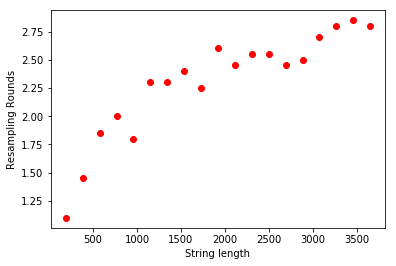

In [559]:
plt.plot(n5,t5, 'ro')
plt.xlabel("String length")
plt.ylabel("Resampling Rounds")
plt.savefig('Rounds vs length of string', dpi = 1200)

In [560]:
n6,t6 = runtime("0123","1001",256,256*20,256,20)

256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
3072
3328
3584
3840
4096
4352
4608
4864


Text(0,0.5,'Resampling Rounds')

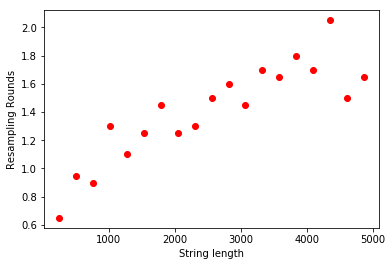

In [561]:
plt.plot(n6,t6, 'ro')
plt.xlabel("String length")
plt.ylabel("Resampling Rounds")

n = w * sig^w * C

In [566]:
n7,t7 = runtime("012","101",81,81*20,81,20)

81
162
243
324
405
486
567
648
729
810
891
972
1053
1134
1215
1296
1377
1458
1539


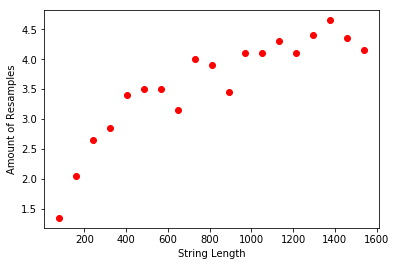

In [569]:
plt.plot(n7,t7,'ro')
plt.xlabel("String Length")
plt.ylabel("Amount of Resamples")
plt.savefig('Sigma = 3 and w = 3', dpi = 1200)

In [572]:
n8,t8 = runtime("012","1001",324,324*20,324,20)

324
648
972
1296
1620
1944
2268
2592
2916
3240
3564
3888
4212
4536
4860
5184
5508
5832
6156


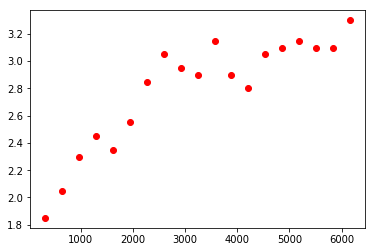

In [574]:
plt.plot(n8,t8,'ro')

In [575]:
n9,t9 = runtime("01","101",24,24 * 20,24,20)

24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456


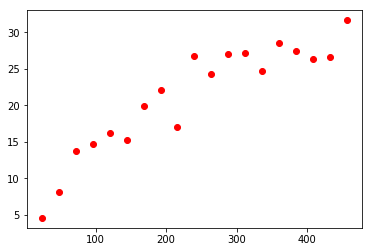

In [577]:
plt.plot(n9,t9,'ro')

8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248
256
264
272
280
288
296
304
312
320
328
336
344
352
360
368
376
384
392
400
408
416
424
432
440
448
456
464
472


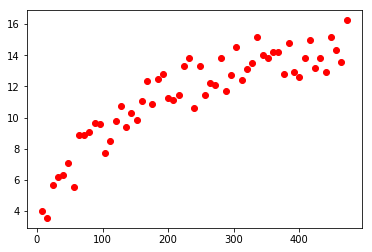

In [645]:
n9,t9 = runtime("01","11",8,8 * 60,8,20)

In [671]:
p = np.polyfit(np.log(t9),n9,1)
a = np.linspace(8,480)

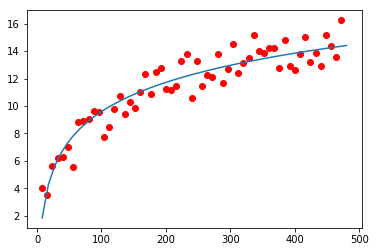

In [675]:
plt.plot(n9,t9,'ro',a,3.06808*np.log(a) - 4.53101)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


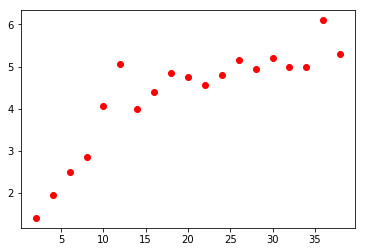

In [581]:
n10,t10 = runtime("01","1",2,2 * 20,2,20)
plt.plot(n10,t10,'ro')

Testing Distribution

In [641]:
r = randstring('10',5)
x = sampling_factory(3200,sampler,'10','10101','101')
hist = []
for i in x:
    hist.append(len(i))

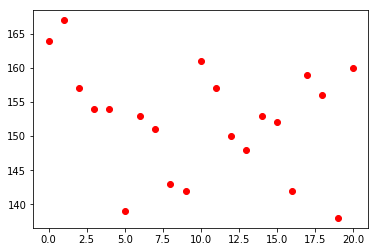

In [642]:
plt.plot([i for i in range(len(hist))],hist,'ro')